# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
!pip install numpy==1.26.4

In [4]:
# Import warnings

import warnings

In [5]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/IIIT Data/EDA/Assignments/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [9]:
df.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files


# Select the folder having data files
os.chdir('/content/drive/MyDrive/IIIT Data/EDA/Assignments/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:

        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        month_df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for dt in month_df['tpep_pickup_datetime'].dt.date.unique():

            day_data = month_df[month_df['tpep_pickup_datetime'].dt.date == dt]

            # # Iterate through each hour of the selected date
            for hr in range(24):

                hour_data = day_data[day_data['tpep_pickup_datetime'].dt.hour == hr]

                if len(hour_data) == 0:
                    continue

                # Sample 5% of the hourly data randomly
                samp = hour_data.sample(frac=0.05, random_state=42)

                # # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, samp])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")




In [12]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2706519         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1059            2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2273            2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
1152            2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
1997            2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2706519           4.71         NaN               None           113   
1059              0.56         1.0                  N           142   
2273             18.46         2.0                  N           132   
1152             13.71         1.0                  N           249   
1997              0.71         1.0                  N           144   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2706519           238             0        24.83    0.0      0.5        4.32   
1059              142             2         5.10    1.0      0.5        0.00   
2273              163             1        70.00    0.0      0.5       15.71   
1152              180             4        59.70    1.0      0.5        0.00   
1997              232             1         7.90    1.0      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
2706519          0.00                    1.0         33.15   
1059             0.00                    1.0         10.10   
2273             6.94                    1.0         98.40   
1152             0.00                    1.0         64.70   
1997             0.00                    1.0         14.90   

         congestion_surcharge  Airport_fee  airport_fee  
2706519                   NaN          NaN          NaN  
1059                      2.5         0.00          NaN  
2273                      2.5         1.75          NaN  
1152                      2.5         0.00          NaN  
1997                      2.5         0.00          NaN

In [13]:
print(df.shape)

(2121853, 20)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('nyc_taxi_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
# Load the new data file
df = pd.read_parquet('nyc_taxi_2023.parquet')

In [17]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2706519         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1059            2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2273            2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
1152            2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
1997            2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2706519           4.71         NaN               None           113   
1059              0.56         1.0                  N           142   
2273             18.46         2.0                  N           132   
1152             13.71         1.0                  N           249   
1997              0.71         1.0                  N           144   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2706519           238             0        24.83    0.0      0.5        4.32   
1059              142             2         5.10    1.0      0.5        0.00   
2273              163             1        70.00    0.0      0.5       15.71   
1152              180             4        59.70    1.0      0.5        0.00   
1997              232             1         7.90    1.0      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
2706519          0.00                    1.0         33.15   
1059             0.00                    1.0         10.10   
2273             6.94                    1.0         98.40   
1152             0.00                    1.0         64.70   
1997             0.00                    1.0         14.90   

         congestion_surcharge  Airport_fee  airport_fee  
2706519                   NaN          NaN          NaN  
1059                      2.5         0.00          NaN  
2273                      2.5         1.75          NaN  
1152                      2.5         0.00          NaN  
1997                      2.5         0.00          NaN

In [18]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121853 entries, 2706519 to 2974021
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee          

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns
df['airport_fee_new'] = df[['Airport_fee', 'airport_fee']].max(axis=1)



In [21]:
df.drop(['Airport_fee', 'airport_fee'], axis=1, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
# check where values of fare amount are negative
(df['fare_amount'] < 0)

0          False
1          False
2          False
3          False
4          False
           ...  
2121848    False
2121849    False
2121850    False
2121851    False
2121852    False
Name: fare_amount, Length: 2121853, dtype: bool

Did you notice something different in the `RatecodeID` column for above records?

In [23]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].value_counts()


Series([], Name: count, dtype: int64)

In [24]:
# Find which columns have negative values
num_cols = df.select_dtypes(include='number')
neg_cols = num_cols.loc[:, (num_cols < 0).any()].columns
print(neg_cols)

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee_new'],
      dtype='object')


In [25]:
  # fix these negative values
df[neg_cols] = df[neg_cols].apply(lambda x: np.where(x < 0, 0, x))

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column
(df.isnull().sum() / len(df))*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.409331
trip_distance            0.000000
RatecodeID               3.409331
store_and_fwd_flag       3.409331
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.409331
airport_fee_new          3.409331
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [27]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
85              2  2023-09-01 00:01:15   2023-09-01 00:07:07              NaN   
151             2  2023-09-01 01:58:13   2023-09-01 02:12:29              NaN   
203             2  2023-09-01 01:08:34   2023-09-01 01:20:38              NaN   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              NaN   
...           ...                  ...                   ...              ...   
2121721         2  2023-11-28 17:49:03   2023-11-28 18:05:46              NaN   
2121744         1  2023-11-28 18:26:09   2023-11-28 19:07:10              NaN   
2121807         2  2023-11-28 21:37:29   2023-11-28 21:51:11              NaN   
2121832         2  2023-11-28 22:01:00   2023-11-28 22:25:00              NaN   
2121833         1  2023-11-28 22:53:04   2023-11-28 23:12:16              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.71         NaN               None           113   
85                1.07         NaN               None           148   
151               3.32         NaN               None           211   
203               2.67         NaN               None           144   
251               0.00         NaN               None            79   
...                ...         ...                ...           ...   
2121721           1.28         NaN               None           162   
2121744           3.70         NaN               None           237   
2121807           2.35         NaN               None           234   
2121832           5.88         NaN               None           144   
2121833           0.00         NaN               None           234   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 238             0        24.83    0.0      0.5        4.32   
85                  4             0        11.88    0.0      0.5        2.00   
151               230             0        19.04    0.0      0.5        4.61   
203                65             0        19.89    0.0      0.5        4.30   
251                48             0        19.85    0.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
2121721            48             0        16.82    0.0      0.5        0.00   
2121744           249             0        25.40    2.5      0.5        3.19   
2121807            48             0        14.47    0.0      0.5        0.00   
2121832           181             0        25.59    0.0      0.5        4.44   
2121833           152             0        32.68    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.15   
85                0.0                    1.0         17.88   
151               0.0                    1.0         27.65   
203               0.0                    1.0         28.19   
251               0.0                    1.0         23.85   
...               ...                    ...           ...   
2121721           0.0                    1.0         20.82   
2121744           0.0                    1.0         35.09   
2121807           0.0                    1.0         18.47   
2121832           0.0                    1.0         34.03   
2121833           0.0                    1.0         36.68   

         congestion_surcharge  airport_fee_new  
0                         NaN              NaN  
85                        NaN              NaN  
151                       NaN              NaN  
203                       NaN              NaN  
251                       NaN              NaN  
...                       ...              ...  
2121721                   NaN              NaN  
2121744                   NaN              NaN  
2121807                   NaN       

In [28]:
df['passenger_count']= df['passenger_count'].fillna(df['passenger_count'].mode()[0])

In [29]:
df['passenger_count'].isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [30]:
# Fix missing values in 'RatecodeID'
df['RatecodeID']= df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [31]:
df['RatecodeID'].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [32]:
# handle null values in congestion_surcharge
med_col = df['congestion_surcharge'].median()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(med_col)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [33]:
# Handle any remaining missing values

(df.isnull().sum() / len(df))*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.409331
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee_new          3.409331
dtype: float64

In [34]:
df['store_and_fwd_flag'].mode()

0    N
Name: store_and_fwd_flag, dtype: object

In [35]:
df['store_and_fwd_flag']= df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

In [36]:
df['airport_fee_new'] = df['airport_fee_new'].fillna(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [37]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.121853e+06                     2121853                     2121853   
mean   1.732979e+00  2023-07-02 19:56:41.207843  2023-07-02 20:14:07.526374   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:02:23         2023-04-02 16:21:59   
50%    2.000000e+00         2023-06-27 15:39:08         2023-06-27 15:56:26   
75%    2.000000e+00         2023-10-06 19:40:20         2023-10-06 19:56:06   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.477403e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.121853e+06   2.121853e+06  2.121853e+06  2.121853e+06   
mean      1.356511e+00   3.824893e+00  1.610770e+00  1.653013e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.800074e-01   1.227695e+02  7.251894e+00  6.399520e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.121853e+06  2.121853e+06  2.121853e+06  2.121853e+06  2.121853e+06   
mean   1.640724e+02  1.163848e+00  1.991257e+01  1.588556e+00  4.952836e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980028e+01  5.079554e-01  9.994927e+01  1.829484e+00  4.860397e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.121853e+06  2.121853e+06           2.121853e+06  2.121853e+06   
mean   3.548363e+00  5.965107e-01           9.990046e-01  2.897709e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.062558e+00  2.187285e+00           2.919913e-02  1.008787e+02   

       congestion_surcharge  airport_fee_new  
count          2.121853e+06     2.121853e+06  
mean           2.314405e+00     1.381132e-01  
min            0.000000e+00     0.000000e+00  
25%            2.500000e+00     0.000000e+00  
50%            2.500000e+00     0.000000e+00  
75%            2.500000e+00     0.000000e+00  
max            2.500000e+00     1.750000e+00  
std            6.553937e-01     4.577329e-01

In [38]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee_new'],
      dtype='object')


In [39]:
cols = ['trip_distance',  'fare_amount', 'extra', 'tip_amount', 'tolls_amount',  'total_amount' ]
plt.figure(figsize=(15, 10))
for i, col in enumerate( cols, 1):

  plt.subplot(3,3,i)
  plt.boxplot(df[col])
  plt.title(col)
  plt.ylabel(col)
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [40]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [41]:
# Continue with outlier handling
df= df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~( (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) )]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]

In [42]:
# Do any columns need standardising?
cols = ['trip_distance',  'fare_amount',  'tip_amount', 'tolls_amount',  'total_amount' ]

for col in cols:
    col_range = df[col].max() - df[col].min()
    print(f"{col}: = {col_range}")



trip_distance: = 204.86
fare_amount: = 143163.45
tip_amount: = 223.08
tolls_amount: = 143.0
total_amount: = 143167.45


In [43]:
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [44]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_new']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [45]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee_new'],
      dtype='object')


In [47]:
numeric_cols = df.select_dtypes(include=['object', 'category']).columns
print(numeric_cols)

Index(['store_and_fwd_flag'], dtype='object')


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [48]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hr_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')
hr_trend

pickup_hour  pickup_count
0             0         57230
1             1         38325
2             2         25170
3             3         16447
4             4         10552
5             5         11147
6             6         27318
7             7         54830
8             8         76365
9             9         87577
10           10         95824
11           11        104144
12           12        113032
13           13        116503
14           14        124880
15           15        127945
16           16        127958
17           17        138354
18           18        144580
19           19        129750
20           20        115771
21           21        115456
22           22        106458
23           23         83743

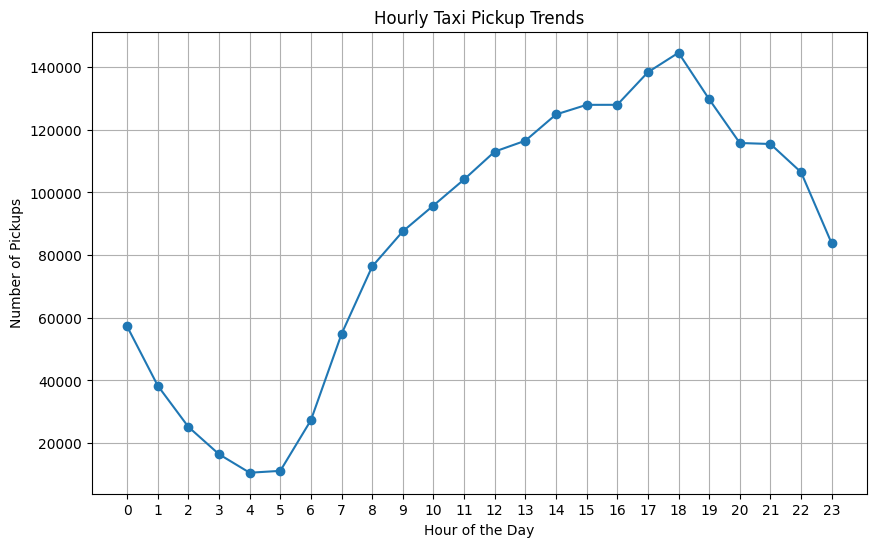

In [49]:
plt.figure(figsize=(10,6))
plt.plot(hr_trend['pickup_hour'], hr_trend['pickup_count'], marker='o')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Taxi Pickup Trends')
plt.grid(True)
plt.show()

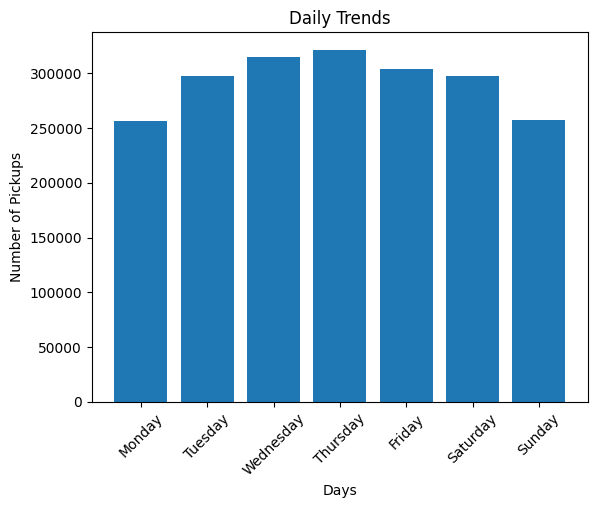

In [50]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
day_trend = df.groupby('pickup_day').size().reset_index(name='pickup_count')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_trend['pickup_day'] = pd.Categorical(day_trend['pickup_day'], categories=day_order, ordered=True)
day_trend = day_trend.sort_values('pickup_day')
plt.bar(day_trend['pickup_day'], day_trend['pickup_count'])
plt.xlabel('Days')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
month_trend = df.groupby('pickup_month').size().reset_index(name='pickup_count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_trend['pickup_month'] = pd.Categorical(month_trend['pickup_month'], categories=month_order, ordered=True)
month_trend = month_trend.sort_values('pickup_month')
plt.bar(month_trend['pickup_month'], month_trend['pickup_count'])
plt.xlabel('Months')
plt.ylabel('Number of Pickups')
plt.title('Monthly Taxi Pickup Trends')
plt.xticks(rotation=45)

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [52]:
# Analyse the above parameters
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols:
  zero_val = (df[col] == 0).sum()
  print(f"{col}: {zero_val} zeros")
for col in cols:
  neg_val = (df[col] < 0).sum()
  print(f"{col}: {neg_val} Negative Values")

fare_amount: 642 zeros
tip_amount: 458711 zeros
total_amount: 371 zeros
trip_distance: 25583 zeros
fare_amount: 0 Negative Values
tip_amount: 0 Negative Values
total_amount: 0 Negative Values
trip_distance: 0 Negative Values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [53]:
# Create a df with non zero entries for the selected parameters.
cols = ['fare_amount','tip_amount','total_amount','trip_distance']

df_no_zero = df.copy()

for col in cols:
    df_no_zero = df_no_zero[df_no_zero[col] != 0]
print(f"shape of df: {df.shape}")
print(f"shape of df_no_zero: {df_no_zero.shape}")


shape of df: (2049359, 22)
shape of df_no_zero: (1581370, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [54]:
# Group data by month and analyse monthly revenue

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_revenue = monthly_revenue.reindex(month_order)
plt.figure(figsize=(10,6))
sns.barplot(x = monthly_revenue.index, y = monthly_revenue.values )
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.title('monthly revenue (total_amount) trend')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [55]:
# Calculate proportion of each quarter
def get_quarter(m):
  if m in [1, 2, 3]:
    return 'Q1'
  elif m in [4, 5, 6]:
    return 'Q2'
  elif m in [7, 8, 9]:
    return 'Q3'
  else:
    return 'Q4'
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.month.apply(get_quarter)
quarter_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarter_proportion = (quarter_revenue / quarter_revenue.sum()) * 100
print(quarter_proportion)

pickup_quarter
Q1    23.602024
Q2    26.688032
Q3    22.943375
Q4    26.766569
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [56]:
# Show how trip fare is affected by distance
df_with_no_zero = df[df['trip_distance'] > 0]
plt.figure(figsize=(10, 6))
plt.scatter(df_with_no_zero['trip_distance'], df_with_no_zero['fare_amount'], s=10)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount ')
plt.title('Relationship between trip_distance and fare_amount')
plt.grid(True)
plt.show()
correlation = df_with_no_zero['trip_distance'].corr(df_with_no_zero['fare_amount'])
print(f'Correlation between trip_distance and fare_amount : {correlation:.4f}' )


Correlation between trip_distance and fare_amount : 0.1649


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [57]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount ')
plt.title('Relationship between trip_duration and fare_amount')
plt.grid(True)
plt.show()
correlation = df['trip_duration'].corr(df['fare_amount'])
print(f'Correlation between trip_duration and fare_amount : {correlation:.4f}' )

Correlation between trip_duration and fare_amount : 0.0470


In [58]:
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.049359e+06                     2049359                     2049359   
mean   1.736251e+00  2023-07-01 21:19:20.974164  2023-07-01 21:36:43.277008   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:13:14         2023-04-01 20:28:19   
50%    2.000000e+00         2023-06-26 08:21:03         2023-06-26 08:38:12   
75%    2.000000e+00         2023-10-05 19:22:11         2023-10-05 19:39:00   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406651e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.049359e+06   2.049359e+06  2.049359e+06  2.049359e+06   
mean      1.369029e+00   1.681811e-02  1.631636e+00  1.654795e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   5.125452e-03  1.000000e+00  1.320000e+02   
50%       1.000000e+00   8.688861e-03  1.000000e+00  1.620000e+02   
75%       1.000000e+00   1.645026e-02  1.000000e+00  2.340000e+02   
max       6.000000e+00   1.000000e+00  9.900000e+01  2.650000e+02   
std       8.925425e-01   2.221522e-02  7.374325e+00  6.366819e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.049359e+06  2.049359e+06  2.049359e+06  2.049359e+06  2.049359e+06   
mean   1.643565e+02  1.204890e+00  1.383696e-04  1.638633e+00  4.953353e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  6.496071e-05  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  9.429781e-05  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  1.529720e-04  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.000000e+00  1.425000e+01  4.000000e+00   
std    6.973699e+01  4.664316e-01  7.099865e-04  1.836328e+00  4.835164e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.049359e+06  2.049359e+06           2.049359e+06  2.049359e+06   
mean   1.602376e-02  4.165949e-03           9.992835e-01  2.021018e-04   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    4.482697e-03  0.000000e+00           1.000000e+00  1.114779e-04   
50%    1.282051e-02  0.000000e+00           1.000000e+00  1.466814e-04   
75%    1.994800e-02  0.000000e+00           1.000000e+00  2.144342e-04   
max    1.000000e+00  1.000000e+00           1.000000e+00  1.000000e+00   
std    1.827687e-02  1.526505e-02           2.497148e-02  7.164468e-04   

       congestion_surcharge  airport_fee_new   pickup_hour  trip_duration  
count          2.049359e+06     2.049359e+06  2.049359e+06   2.049359e+06  
mean           2.307993e+00     1.429863e-01  1.429726e+01   1.737171e+01  
min            0.000000e+00     0.000000e+00  0.000000e+00  -5.430000e+01  
25%            2.500000e+00     0.000000e+00  1.100000e+01   7.583333e+00  
50%            2.500000e+00     0.000000e+00  1.500000e+01   1.253333e+01  
75%            2.500000e+00     0.000000e+00  1.900000e+01   2.050000e+01  
max            2.500000e+00     1.750000e+00  2.300000e+01   6.266383e+03  
std            6.656961e-01     4.649884e-01  5.775613e+00   4.194114e+01

In [59]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, alpha = 0.5)
plt.xlabel('No of passengers')
plt.ylabel('Fare Amount ')
plt.title('Relationship between passengers and Fare Amount')
plt.grid(True)
plt.show()
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f'Correlation between passenger and fare_amount : {correlation:.2f}' )

Correlation between passenger and fare_amount : 0.01


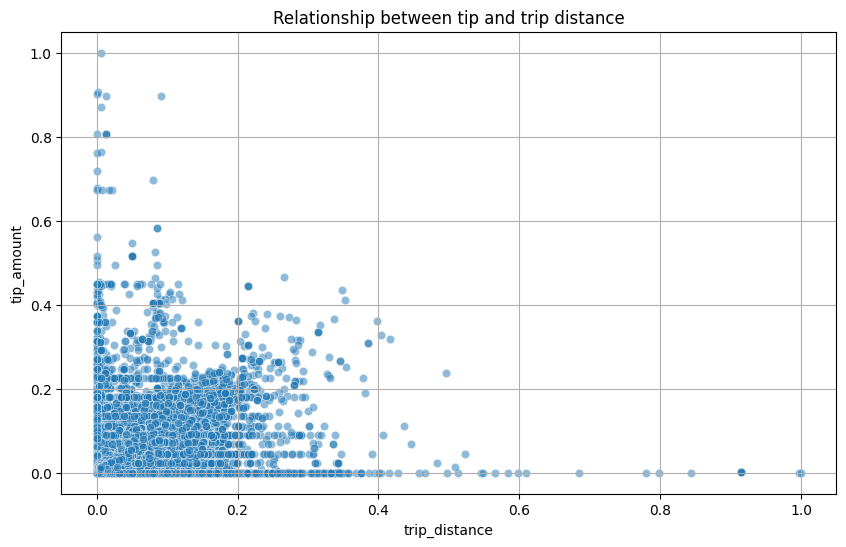

Correlation between tip and trip distance : 0.57


In [60]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha = 0.5)
plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
plt.title('Relationship between tip and trip distance')
plt.grid(True)
plt.show()
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f'Correlation between tip and trip distance : {correlation:.2f}' )


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [61]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}

df['payment_name'] = df['payment_type'].map(payment_mapping)

all_payment_types = ['Credit Card', 'Cash', 'No Charge', 'Dispute']
payment_counts = df['payment_name'].value_counts().reindex(all_payment_types, fill_value=0)

payment_df = pd.DataFrame({
    'Type': payment_counts.index,
    'Count': payment_counts.values})

payment_df = payment_df[payment_df['Count'] > 0]


plt.figure(figsize=(10,6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [62]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [63]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/IIIT Data/EDA/Assignments/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

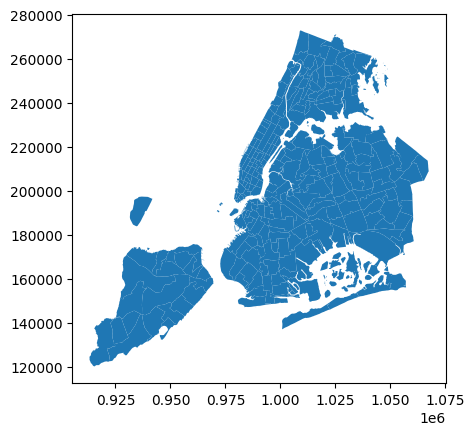

In [64]:
print(zones.info())
zones.plot()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [65]:
# Merge zones and trip records using locationID and PULocationID
combined_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
combined_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
1         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
2         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
3         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
4         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.002734         1.0                  N           142           142   
1       0.090110         2.0                  N           132           163   
2       0.066924         1.0                  N           249           180   
3       0.003466         1.0                  N           144           232   
4       0.021429         1.0                  N            79           263   

   payment_type  ...  pickup_quarter  trip_duration  payment_name  OBJECTID  \
0             2  ...              Q3       2.483333          Cash     142.0   
1             1  ...              Q3      44.583333   Credit Card     132.0   
2             4  ...              Q3      38.116667       Dispute     249.0   
3             1  ...              Q3       6.300000   Credit Card     144.0   
4             1  ...              Q3      13.416667   Credit Card      79.0   

   Shape_Leng  Shape_Area                 zone  LocationID    borough  \
0    0.038176    0.000076  Lincoln Square East       142.0  Manhattan   
1    0.245479    0.002038          JFK Airport       132.0     Queens   
2    0.036384    0.000072         West Village       249.0  Manhattan   
3    0.027620    0.000047  Little Italy/NoLiTa       144.0  Manhattan   
4    0.042625    0.000108         East Village        79.0  Manhattan   

                                            geometry  
0  POLYGON ((989380.305 218980.247, 989359.803 21...  
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
2  POLYGON ((983555.319 204876.901, 983469.158 20...  
3  POLYGON ((985411.76 200369.518, 985342.573 200...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [66]:
# Group data by location and calculate the number of trips
trips_per_location = combined_df.groupby('PULocationID').size().reset_index(name='trip_counts')
trips_per_location.head()


PULocationID  trip_counts
0             1          252
1             2            2
2             3           45
3             4         2069
4             5           13

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [67]:
# Merge trip counts back to the zones GeoDataFrame
zones_trips = pd.merge(zones, trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')
zones_trips.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_counts  
0           1.0        252.0  
1           2.0          2.0  
2           3.0         45.0  
3           4.0       2069.0  
4           5.0         13.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [68]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones_trips.plot(
    column='trip_counts',
    cmap='coolwarm',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "No of Trips",
        'orientation': "horizontal"
    },

)

ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()



In [69]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_trips.sort_values(by='trip_counts', ascending=False)
sorted_zones.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  trip_counts  
131         132.0     108530.0  
236         237.0      97174.0  
160         161.0      96008.0  
235         236.0      86931.0  
161         162.0      73495.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [70]:
# Find routes which have the slowest speeds at different times of the day
df_new = df.copy()
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
df_new = df_new[(df_new['trip_duration'] > 0) & (df_new['trip_distance'] > 0)]

df_grouped = df_new.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).mean(numeric_only=True).reset_index()
df_grouped['avg_speed'] = df_grouped['trip_distance'] / df_grouped['trip_duration']
slow_routes = df_grouped.sort_values('avg_speed').head(10)
print(slow_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed']])

        PULocationID  DOLocationID  pickup_hour  avg_speed
102294           232            65           13   0.000026
114929           243           264           17   0.000038
61252            142           142            5   0.000116
120428           258           258            1   0.000128
33393            100             7            8   0.000193
6451              40            65           21   0.000229
39490            113           235           22   0.000235
89226            194           194           16   0.000239
95261            226           145           18   0.000253
9705              45            45           10   0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [71]:
# Visualise the number of trips per hour and find the busiest hour
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
trips_per_hr = df_new.groupby('pickup_hour').size().reset_index(name='pickup_count')
busiest_hr = trips_per_hr.loc[trips_per_hr['pickup_count'].idxmax()]
print(f"Busiest hour: {busiest_hr['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hr['pickup_count']}")
plt.figure(figsize=(10,6))
plt.bar(trips_per_hr['pickup_hour'], trips_per_hr['pickup_count'])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Hour")
plt.xticks(range(0, 24))
plt.show()

Busiest hour: 18
Number of trips during busiest hour: 143110


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [72]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.005
top_5 = trips_per_hr.sort_values('pickup_count', ascending = False).head(5)
top_5['Trips'] = top_5['pickup_count'] / sample_fraction
print(top_5[['pickup_hour' , 'pickup_count']])



    pickup_hour  pickup_count
18           18        143110
17           17        136678
19           19        128538
15           15        126311
16           16        126265


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

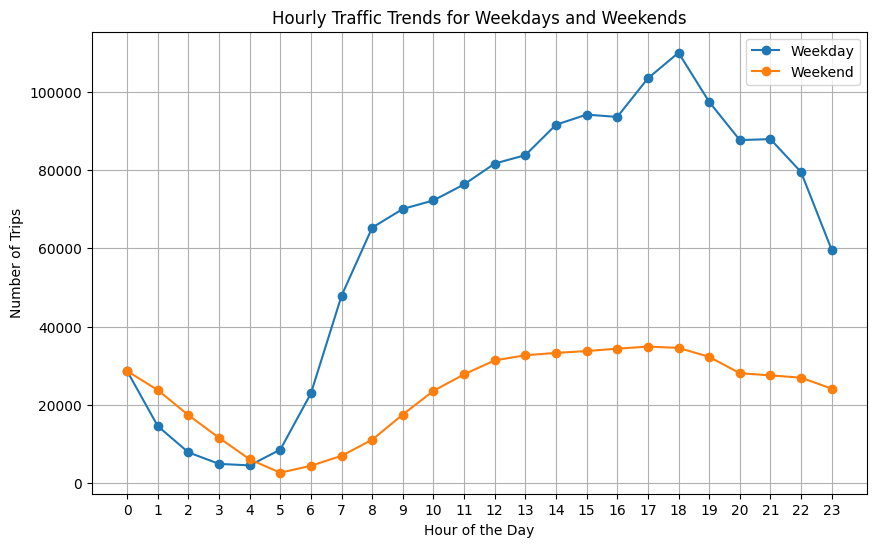

In [73]:
# Compare traffic trends for the week days and weekends
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
weekday_count = df[df['day_type'] == 'Weekday'].groupby('hour')['tpep_pickup_datetime'].count()
weekend_count = df[df['day_type'] == 'Weekend'].groupby('hour')['tpep_pickup_datetime'].count()
plt.figure(figsize=(10,6))
plt.plot(weekday_count.index, weekday_count.values, label='Weekday', marker = 'o')
plt.plot(weekend_count.index, weekend_count.values, label='Weekend', marker = 'o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.title('Hourly Traffic Trends for Weekdays and Weekends')
plt.legend()
plt.grid(True)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [74]:
# Find top 10 pickup and dropoff zones
pickup_counts = df.groupby('PULocationID').size().sort_values(ascending=False).head(10).reset_index(name='pickup_count')
top_pickup_zones = pickup_counts.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
print(top_pickup_zones)

   PULocationID  pickup_count  LocationID                          zone
0           132        108530         132                   JFK Airport
1           237         97174         237         Upper East Side South
2           161         96008         161                Midtown Center
3           236         86931         236         Upper East Side North
4           162         73495         162                  Midtown East
5           138         71736         138             LaGuardia Airport
6           186         71136         186  Penn Station/Madison Sq West
7           230         68569         230     Times Sq/Theatre District
8           142         67981         142           Lincoln Square East
9           170         60966         170                   Murray Hill


In [75]:
# Top 10 dropoff zones
dropoff_counts = df.groupby('DOLocationID').size().sort_values(ascending=False).head(10).reset_index(name='dropoff_count')
top_dropoff_zones = dropoff_counts.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
print(top_dropoff_zones)

   DOLocationID  dropoff_count  LocationID                       zone
0           236          91136         236      Upper East Side North
1           237          86755         237      Upper East Side South
2           161          80190         161             Midtown Center
3           230          63181         230  Times Sq/Theatre District
4           170          60911         170                Murray Hill
5           162          58459         162               Midtown East
6           142          57661         142        Lincoln Square East
7           239          57448         239      Upper West Side South
8           141          54316         141            Lenox Hill West
9            68          51937          68               East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [76]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_count = df['PULocationID'].value_counts()
dropoff_count = df['DOLocationID'].value_counts()
ratios = pd.DataFrame({'pickup_count' : pickup_count, 'dropoff_count': dropoff_count}).fillna(0)
ratios['ratio_of_pickup_dropoff'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)

ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios[['zone', 'ratio_of_pickup_dropoff']]
ratios = ratios.reset_index(drop=True)
ratios_sorted = ratios.sort_values(by='ratio_of_pickup_dropoff', ascending=False)
top_pickup_dropoff_ratios = ratios_sorted.head(10).reset_index(drop=True)
last_pickup_dropoff_ratios = ratios_sorted.dropna(subset=['ratio_of_pickup_dropoff']).tail(10)


In [77]:
top_pickup_dropoff_ratios

zone  ratio_of_pickup_dropoff
0                 East Elmhurst                 8.474301
1                   JFK Airport                 4.632096
2             LaGuardia Airport                 2.891065
3  Penn Station/Madison Sq West                 1.582875
4                  Central Park                 1.380396
5       Greenwich Village South                 1.379389
6                  West Village                 1.326165
7                  Midtown East                 1.257206
8                Midtown Center                 1.197257
9              Garment District                 1.192388

In [78]:
last_pickup_dropoff_ratios

zone  ratio_of_pickup_dropoff
194                            Ridgewood                 0.050450
0                         Newark Airport                 0.042668
253                      Windsor Terrace                 0.040476
111                  Grymes Hill/Clifton                 0.040000
217                            Stapleton                 0.027027
26   Breezy Point/Fort Tilden/Riis Beach                 0.023810
29                         Broad Channel                 0.000000
241                        West Brighton                 0.000000
99                       Freshkills Park                 0.000000
172                              Oakwood                 0.000000

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [79]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_drops = df[(df['tpep_pickup_datetime'].dt.hour >= 23)| (df['tpep_pickup_datetime'].dt.hour < 5)]

pickup_zone = zones[['LocationID', 'zone']].copy()
pickup_zone.columns = ['PULocationID', 'pickup_zone']
dropoff_zone = zones[['LocationID', 'zone']].copy()
dropoff_zone.columns = ['DOLocationID', 'dropoff_zone'] # Corrected typo here

night_data = (night_drops.merge(pickup_zone, on='PULocationID',how='left').merge(dropoff_zone, on='DOLocationID', how='left'))
top_night_pickup = (night_data['pickup_zone'].value_counts().head(10))
top_night_dropoff = (night_data['dropoff_zone'].value_counts().head(10))

In [80]:
top_night_pickup

pickup_zone
East Village                    17120
JFK Airport                     14963
West Village                    13736
Clinton East                    10954
Lower East Side                 10716
Greenwich Village South          9768
Times Sq/Theatre District        8696
Penn Station/Madison Sq West     6997
Midtown South                    6656
LaGuardia Airport                6603
Name: count, dtype: int64

In [81]:
top_night_dropoff

dropoff_zone
East Village                 9188
Clinton East                 7440
Murray Hill                  6791
Gramercy                     6292
East Chelsea                 6217
Lenox Hill West              5736
West Village                 5490
Yorkville West               5470
Lower East Side              4834
Times Sq/Theatre District    4809
Name: count, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [82]:
# Filter for night hours (11 PM to 5 AM)
night_data = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour <= 5)]
day_data = df[(df['tpep_pickup_datetime'].dt.hour <= 22) & (df['tpep_pickup_datetime'].dt.hour >= 6)]


nighttime_rev = night_data['total_amount'].sum()
daytime_rev = day_data['total_amount'].sum()

total_rev = df['total_amount'].sum()

nighttime_rev_share = (nighttime_rev / total_rev) * 100
daytime_rev_share = (daytime_rev / total_rev) * 100
print('Night_time Revenue Share : ' , nighttime_rev_share.round(2), '%')
print('Day_time Revenue Share:', daytime_rev_share.round(2), '%')

Night_time Revenue Share :  12.05 %
Day_time Revenue Share: 87.95 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [83]:
# Analyse the fare per mile per passenger for different passenger counts

df_new = df.loc[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()
df_new['fare_per_mile'] = df_new['total_amount'] / df_new['trip_distance']
df_new['fare_per_mile_per_passenger'] = df_new['fare_per_mile'] / df_new['passenger_count']
avg_fare = df_new.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare

passenger_count
1.0    0.024168
2.0    0.013379
3.0    0.008697
4.0    0.008811
5.0    0.003962
6.0    0.003159
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [84]:
# Compare the average fare per mile for different days and for different times of the day

df_new = df.loc[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()
df_new['fare_per_mile'] = df_new['total_amount'] / df_new['trip_distance']
df_new['day_of_week'] = df_new['tpep_pickup_datetime'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_new['day_of_week'] = pd.Categorical(df_new['day_of_week'], categories=weekday_order, ordered=True)
avg_fare_per_mile_by_day = df_new.groupby('day_of_week', observed = True)['fare_per_mile'].mean().round(2)

In [85]:
avg_fare_per_mile_by_day

day_of_week
Monday       0.02
Tuesday      0.03
Wednesday    0.02
Thursday     0.02
Friday       0.02
Saturday     0.02
Sunday       0.03
Name: fare_per_mile, dtype: float64

In [86]:
df_new['hour'] = df['tpep_pickup_datetime'].dt.hour
avg_fare_per_mile_by_time =df_new.groupby('hour')['fare_per_mile'].mean().round(2)

In [87]:
avg_fare_per_mile_by_time

hour
0     0.02
1     0.02
2     0.02
3     0.02
4     0.03
5     0.03
6     0.02
7     0.02
8     0.02
9     0.02
10    0.03
11    0.02
12    0.03
13    0.03
14    0.02
15    0.03
16    0.03
17    0.03
18    0.03
19    0.03
20    0.02
21    0.02
22    0.02
23    0.02
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [88]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee_new',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_quarter',
       'trip_duration', 'payment_name', 'hour', 'day_of_week', 'day_type'],
      dtype='object')

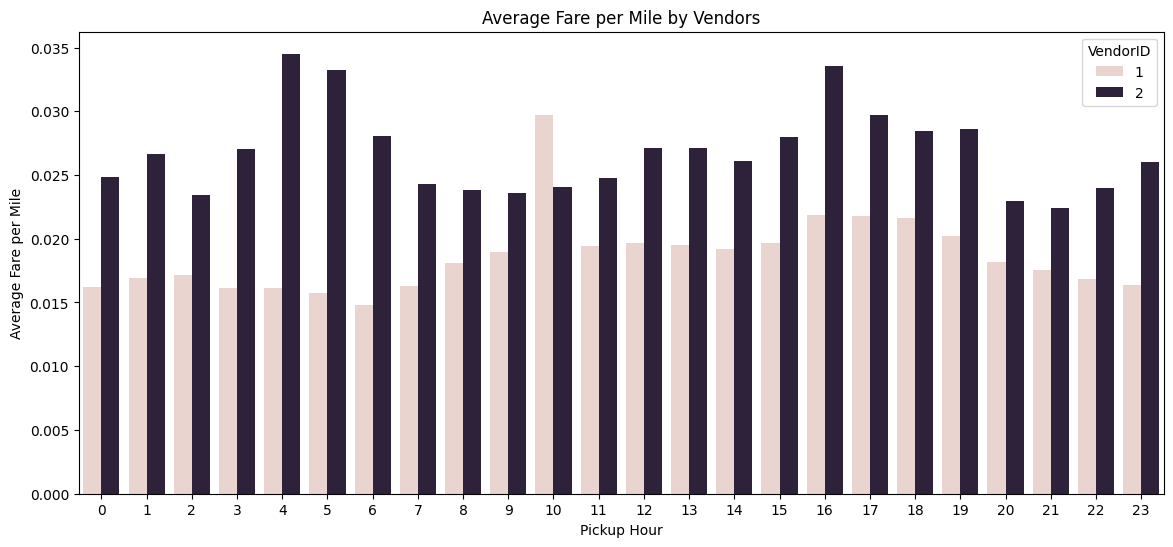

In [89]:
# Compare fare per mile for different vendors
df_vendors = df[df['trip_distance'] > 0].copy()
df_vendors['fare_per_mile'] = df_vendors['total_amount'] / df_vendors['trip_distance']
df_vendors['pickup_hour'] = df_vendors['tpep_pickup_datetime'].dt.hour
avg_fare_per_mile_by_vendor = df_vendors.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean()
avg_fare_per_mile_by_vendor = avg_fare_per_mile_by_vendor.reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=avg_fare_per_mile_by_vendor , x='pickup_hour',y='fare_per_mile', hue='VendorID')
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Vendors")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


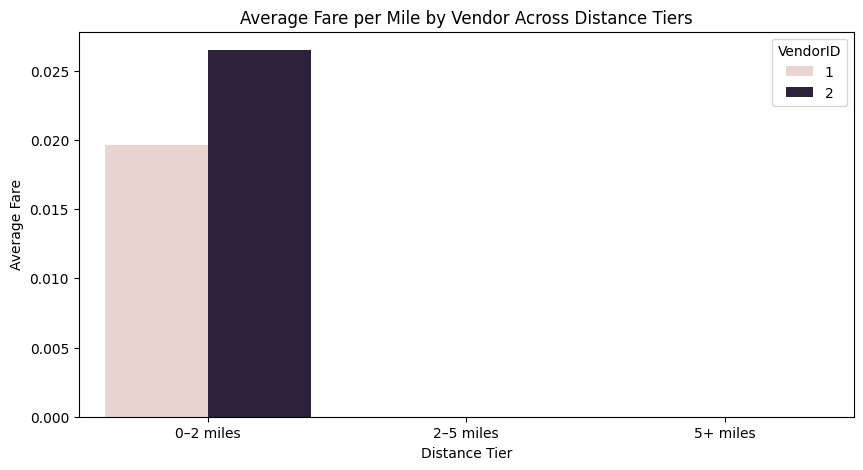

In [90]:
# Defining distance tiers

df_tier = df[df['trip_distance'] > 0].copy()
df_tier['fare_per_mile'] = df_tier['total_amount'] / df_tier['trip_distance']
short_trip = df_tier[df_tier['trip_distance'] <= 2].copy()
short_trip['trip_tier'] = '0–2 miles'

medium_trip = df_tier[(df_tier['trip_distance'] > 2) & (df_tier['trip_distance'] <= 5)].copy()
medium_trip['trip_tier'] = '2–5 miles'

long_trip = df_tier[df_tier['trip_distance'] > 5].copy()
long_trip['trip_tier'] = '5+ miles'
df_dist_tier = pd.concat([short_trip, medium_trip, long_trip])

avg_tier_fare = df_dist_tier.groupby(['VendorID', 'trip_tier'])['fare_per_mile'].mean().reset_index()
order = ['0–2 miles', '2–5 miles', '5+ miles']
plt.figure(figsize=(10,5))
sns.barplot(data=avg_tier_fare, x='trip_tier', y='fare_per_mile',hue='VendorID', order = order)

plt.title("Average Fare per Mile by Vendor Across Distance Tiers")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare")
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [92]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percent'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100

def distance(dist):
  if dist < 2:
    return 'Up to 2 miles'
  elif dist < 5:
    return '2 to 5 miles'
  else:
    return '5+ miles'
df['distance_value'] = df['trip_distance'].apply(distance)
print('Average tip % by Distance:')
print(df.groupby('distance_value')['tip_percent'].mean())


def passenger(p):
  if p == 1:
    return '1 Passenger'
  elif p in [2,3]:
    return '2-3 Passenger'
  else:
    return '4+ Passenger'
df['passenger_value'] = df['passenger_count'].apply(passenger)
print('\nAverage tip % by Passenger Count:')
print(df.groupby('passenger_value')['tip_percent'].mean())

def pickup_hr(hour):
  if 0 <= hour < 6:
    return 'Midnight - 6 am'
  elif 6 <= hour < 12:
    return '6 am - Noon'
  elif 12 <= hour < 18:
    return 'Noon - 6 pm'
  else:
    return '6 pm - Midnight'
df['time_category'] = df['pickup_hour'].apply(pickup_hr)
print('\nAverage tip % by Pickup times:')
print(df.groupby('time_category')['tip_percent'].mean())

low = df[df['tip_percent'] < 10]

print("\nMost Common Low-Tip Scenarios:")

print('\n Most Common Low-Tip Scenarios:')
low_tip_percent = df[df['tip_percent'] < 10]
print(low_tip_percent.groupby(['distance_value', 'passenger_value', 'time_category']).size().sort_values(ascending=False).head(10))

Average tip % by Distance:
distance_value
Up to 2 miles    7676.152672
Name: tip_percent, dtype: float64

Average tip % by Passenger Count:
passenger_value
1 Passenger      7762.356568
2-3 Passenger    7459.811627
4+ Passenger     7270.026678
Name: tip_percent, dtype: float64

Average tip % by Pickup times:
time_category
6 am - Noon        7582.340380
6 pm - Midnight    7909.128287
Midnight - 6 am    7440.860688
Noon - 6 pm        7564.491541
Name: tip_percent, dtype: float64

Most Common Low-Tip Scenarios:

 Most Common Low-Tip Scenarios:
distance_value  passenger_value  time_category  
Up to 2 miles   1 Passenger      Noon - 6 pm        123063
                                 6 pm - Midnight     90518
                                 6 am - Noon         78562
                2-3 Passenger    Noon - 6 pm         38075
                                 6 pm - Midnight     30527
                1 Passenger      Midnight - 6 am     26698
                2-3 Passenger    6 am - Noon       

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [93]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tip_grp'] = np.where(df['tip_percent'] < 10, 'Low Tip (<10%)',
                           np.where(df['tip_percent'] > 25, 'High Tip (>25%)', 'Others'))
tip_df = df[df['tip_grp'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]
cols_to_compare = ['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'tip_percent']
comparison_df = tip_df.groupby('tip_grp')[cols_to_compare].mean().round(2).T
print("Comparison of Low Tip vs High Tip Trips:")
print(comparison_df)

Comparison of Low Tip vs High Tip Trips:
tip_grp          High Tip (>25%)  Low Tip (<10%)
trip_distance               0.02            0.02
passenger_count             1.36            1.42
total_amount                0.00            0.00
tip_amount                  0.02            0.00
tip_percent              9826.91            0.00


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

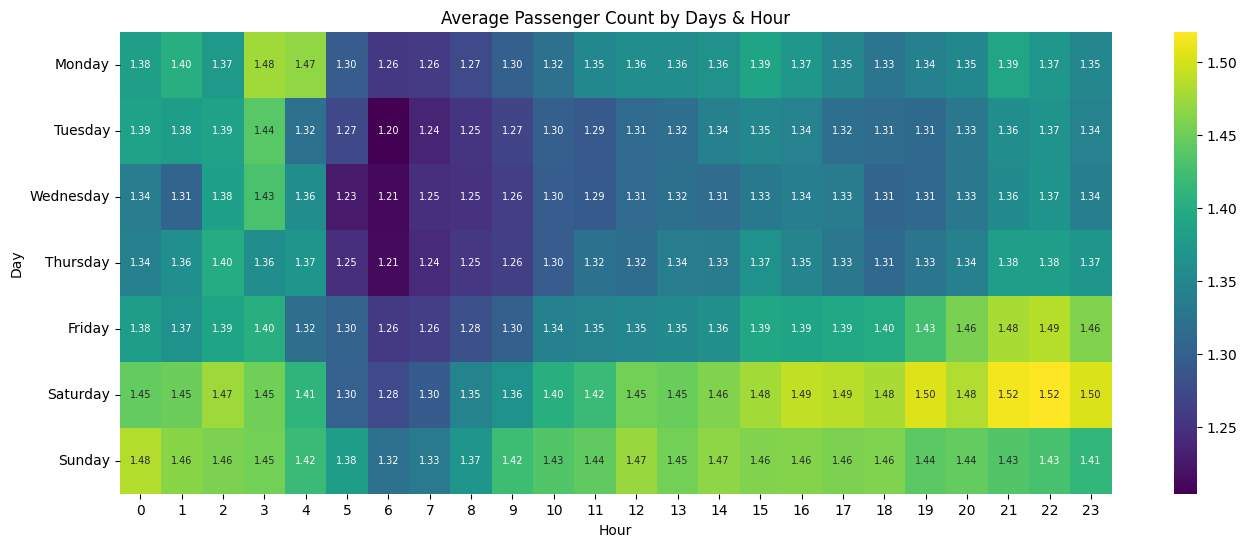

In [94]:
# See how passenger count varies across hours and days
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
pivot_data = df.pivot_table(values = 'passenger_count', index = 'day_of_week', columns= 'hour', aggfunc = 'mean', observed=True)
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_data, cmap = 'viridis', annot=True, fmt=".2f", annot_kws={"size":7})
plt.title("Average Passenger Count by Days & Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

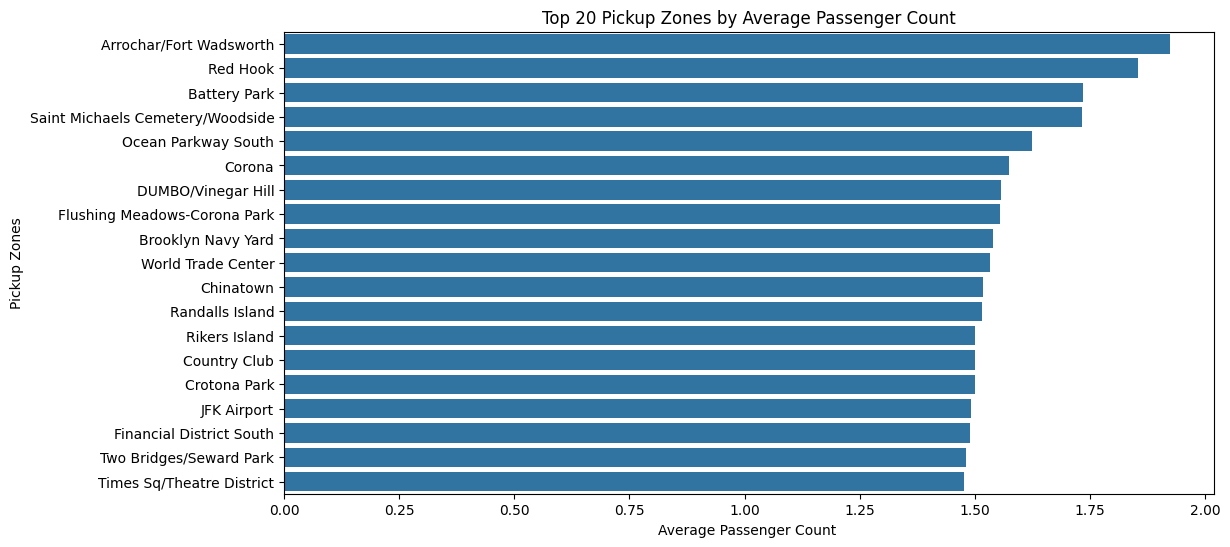

In [95]:
# How does passenger count vary across zones
avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone = avg_passenger_zone.merge(zones[['LocationID', 'zone']], left_on = 'PULocationID', right_on = 'LocationID', how = 'left')
avg_passenger_zone = avg_passenger_zone.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_passenger_zone, x='passenger_count', y='zone')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count ')
plt.ylabel('Pickup Zones')
plt.show()


In [96]:
zones_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_counts  
0           1.0        252.0  
1           2.0          2.0  
2           3.0         45.0  
3           4.0       2069.0  
4           5.0         13.0

In [97]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_trips= zones_trips.merge(avg_passenger_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  trip_counts  PULocationID_y  avg_passenger_count  
0             1.0        252.0             1.0             1.400000  
1             2.0          2.0             2.0             1.000000  
2             3.0         45.0             3.0             1.000000  
3             4.0       2069.0             4.0             1.420297  
4             5.0         13.0             5.0             1.000000




Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge in %
extra                    62.327007
tip_amount               78.140268
tolls_amount              8.095264
improvement_surcharge    99.990414
congestion_surcharge     92.922735
airport_fee_new           8.785607
dtype: float64


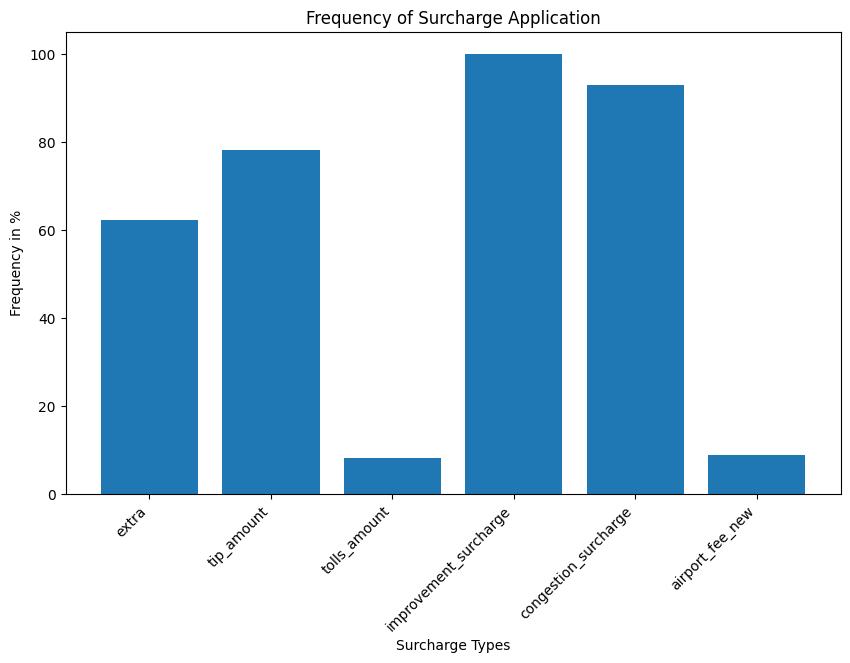

In [98]:
# How often is each surcharge applied?
cols_to_use = ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_new']
surcharge_freq = (df[cols_to_use] > 0).sum()
surcharge_freq = surcharge_freq / len(df) * 100
print('Frequency of Surcharge in %')
print(surcharge_freq)
plt.figure(figsize=(10, 6))
plt.bar(surcharge_freq.index, surcharge_freq.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Types')
plt.ylabel('Frequency in %')
plt.xticks(rotation=45, ha='right')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Summary Of Insights:**
- Time-Based Behaviour:  Ride demand peaks during morning and evening office hours. It increases in nightlife areas late at night and changes on weekends and certain months due to seasonal or tourist activity.
-  Daily Trends: Weekdays sees the most pickups, while Sunday consistently records the lowest demand.

- Monthly Trends: Pickup volumes rise in April, May, and October, with a small dip in July–August due to seasonal slowdown.
- Busy Hour Scaling: 18:00 is the city’s busiest hour, reaching the highest scaled trip count of the day.
- Weekday vs Weekend Traffic: Weekdays show strong office-hour spikes, whereas weekends have lower, more even ride patterns.
- High-Demand Night Zones: - Nighttime demand is highest in areas like East Village, JFK Airport, and Lower East Side due to nightlife and airport flows.
-  Passenger Count Trends: Most trips carry about 1 passenger, with slightly higher counts on Friday and Saturday evenings.

- Tip Percent Trends : Tip percentages influenced by trip characteristics.
- Fare, Tips & Ride Economics: Longer trips naturally cost more, while tip percentages change based on distance, group size, and pickup time, with short rides receiving the lowest tipping.

**Recommendations:**


 Optimize Routes Based on Demand Hotspots:
 - Drivers should follow dynamically updated paths based on real-time traffic and historical slow zones.
 - Implement route optimization algorithms (e.g., shortest path with traffic data) for efficiency

 Smart Dispatching:
 - Schedule more taxis for busy hours and reallocate from low-demand zones in order to reduce idle time.
 - Keep a small reserve of taxis around the airport, business centers, and high-demand areas for handling sudden surges.

 Reducing Operational Inefficiencies:
 - Reduce empty return trips by matching drivers with trips that are close to their current location.
 - use historical data to identify operational bottlenecks and optimize dispatch strategy.

 Customer Experience Enhancement:
 - Provide the availability of multiple payment options and live trip tracking to ensure smoother and faster customer experience.
 - Deploy more taxis during weekends, evenings, and peak-demand hours to reduce passenger wait times.
  
 - Encourage ride-sharing.






**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Suggestions Based on Zone, Time, and Day Trends:**
- **Place more cabs in high-demand pickup zones:**  Drop extra taxis where rides are busiest.
Some zones consistently show higher average passengers.
These include Busy shopping zones, transport centers - also airports - are part of this list.
Taxis should be stationed here throughout the day, especially when traffic gets heavy.

- **Shift cabs dynamically based on time of day :** 	Morning: More taxis near residential areas as people travel to offices, schools, and stations.
Evening: Shift taxis to move towards business districts, market areas, and stations where people head back home.
 Night: Increase presence in nightlife areas (restaurants, clubs, entertainment districts) since demand rises there.

- **Weekend vs weekday zone strategy:** Weekdays: Focus on offices, commercial zones, and transportation hubs. Weekends: Shift toward malls, parks, event venues, and tourist areas because demand patterns change.

- **Balance zones with pickup–drop-off mismatches:** Instead of waiting there, drivers should move immediately to high-demand zones nearby to reduce idle time.
- **Use patterns from heatmaps and hourly trends:** The hourly heatmap shows clear demand peaks at certain hours.This can be utilized by taxi companies to devise a simple demand alert system for the drivers:"Demand rising in Zone X between 5–7 PM". This helps drivers reach the right zone before demand increases.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Data-driven Adjustments:**

- Use tiered pricing based on distance: Keep the short-distance fares low to stay competitive. Apply slightly higher per-mile rates for medium and long trips to increase revenue.
 - Introduce peak-hour dynamic pricing: A small multiplier for peak hours may be applied during high-demand periods.This regulates rush-hour congestion and raises earnings without hikes in prices throughout the day.

- Apply zone-based pricing where demand is very high: Certain zones have a high passenger count regularly. Add a small pickup surcharge to, or flexible pricing for, high-traffic zones.	Offer lower base fare in the low-demand zones to attract riders

- Offer off-peak discounts to boost low-demand hours: Late night or midday periods show reduced demand.	A small discount during these hours encourages more customers which	Helps to keep drivers active and reduces idle time.

-  Keep fares reasonable for short trips and low-tip categories: Tip analysis shows low tips on short-distance rides.	If fares are too high here, customers may shift to competitors.	Maintain economical charge for short trips in order to keep customer satisfied.


